# محاولة لإستكشاف افضل الطرق لتحسين اداء نموذج بيما

In [40]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

df = pd.read_csv('diabetes.csv')
df.head(20) #لاستعراض ال20 السجلات الاولى من إطار البيانات

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# هذه الدالة تعطينا توصيف كامل للبيانات و تكشف لنا في ما إذا كانت هناك قيم مفقودة

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# سيبورن مكتبة جميلة للرسوميات سهلة في الكتابة لكن مفيدة جداً في المعلومات التي ممكن ان نقراءها عبر الهيستوقرام
## فائدها ممكن ان تكون في
## 1- تلخيص توزيع البينات في رسوميات
## 2- فهم او الإطلاع على القيم الفريدة
## 3- تحمل الرسوميات معنى اعمق من الكلمات

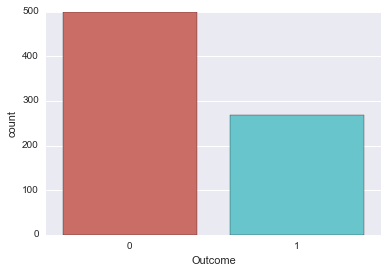

In [4]:
sb.countplot(x='Outcome',data=df, palette='hls')

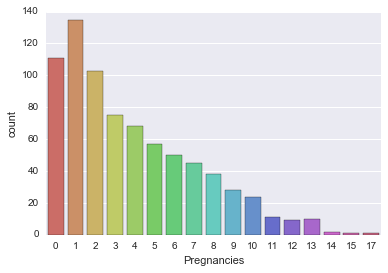

In [5]:
sb.countplot(x='Pregnancies',data=df, palette='hls')

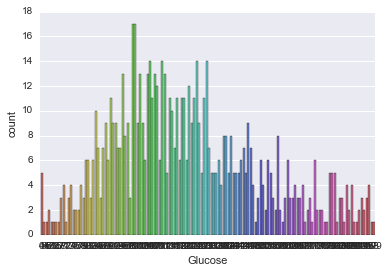

In [6]:
sb.countplot(x='Glucose',data=df, palette='hls')

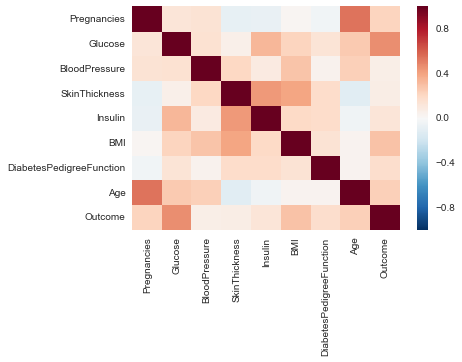

In [7]:
sb.heatmap(df.corr())

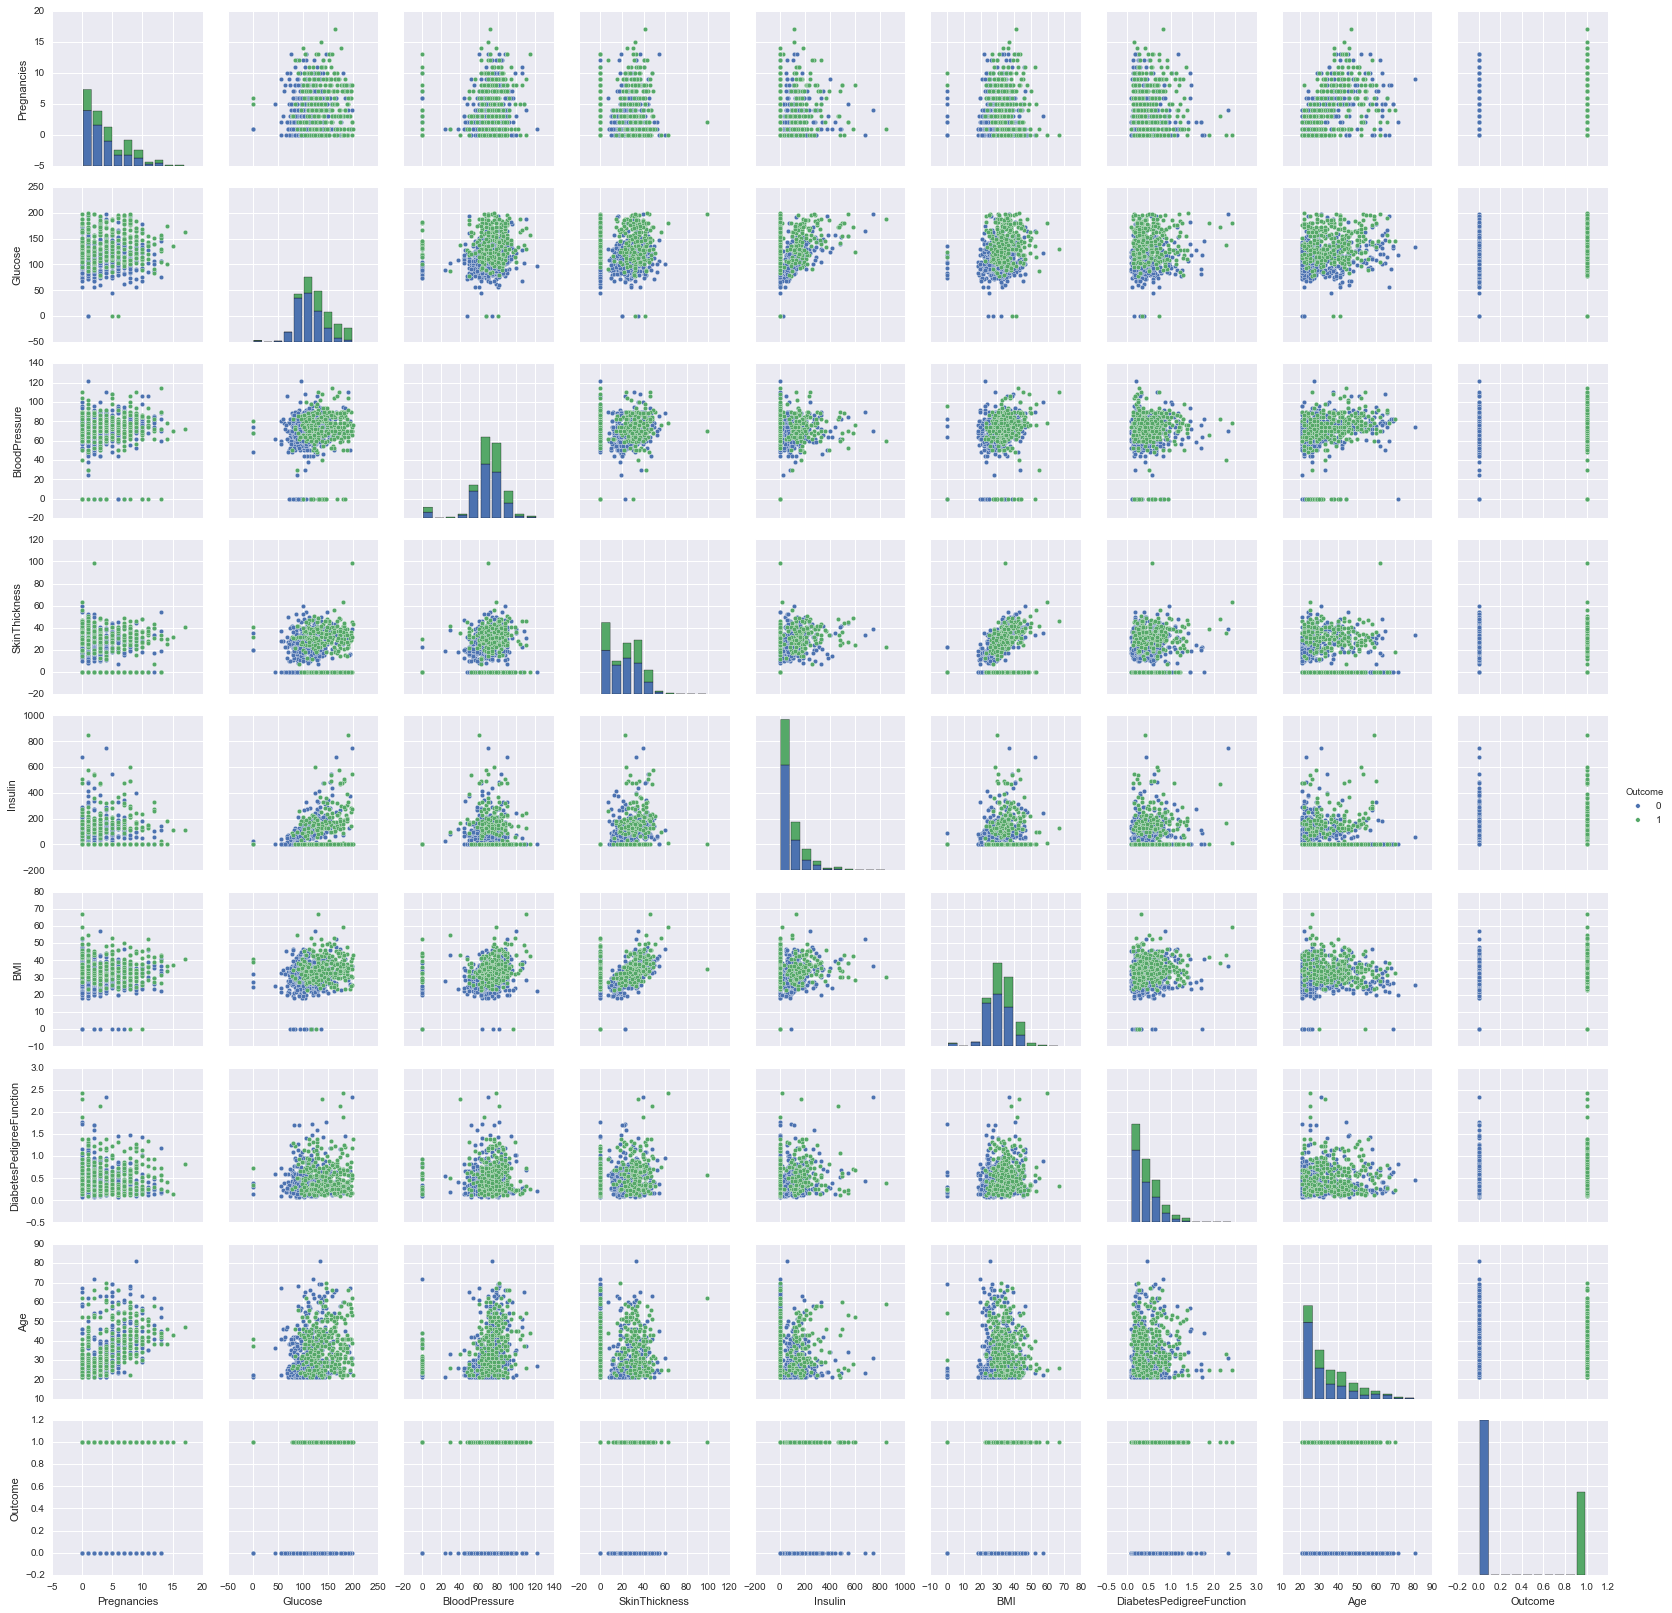

In [8]:
sb.pairplot(df, hue="Outcome")

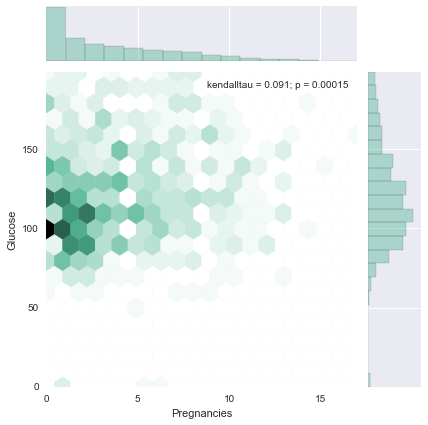

In [12]:
from scipy.stats import kendalltau
sb.jointplot(df['Pregnancies'], df['Glucose'], kind="hex", stat_func=kendalltau, color="#4CB391")

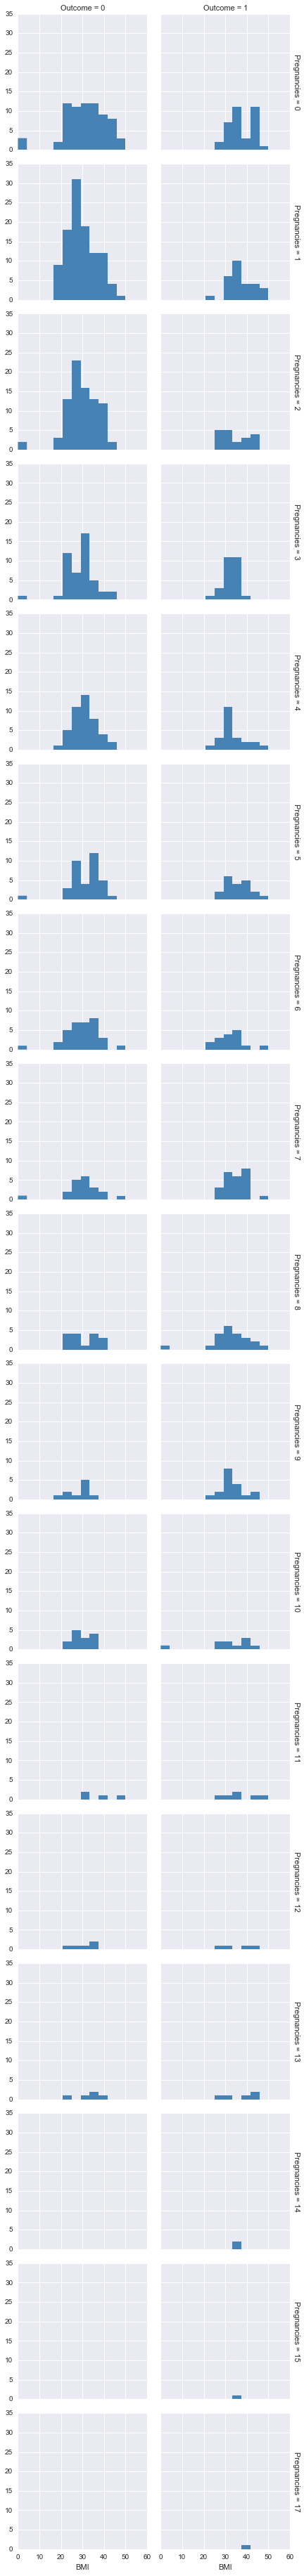

In [31]:
import matplotlib.pyplot as plt
g = sb.FacetGrid(df, row="Pregnancies", col="Outcome", margin_titles=True)
bins = np.linspace(0, 50, 13)
g.map(plt.hist, "BMI", color="steelblue", bins=bins, lw=0)

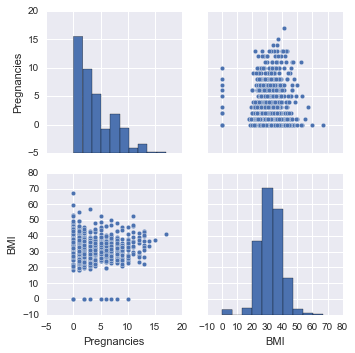

In [33]:
sb.pairplot(df, vars=["Pregnancies", "BMI"])

# تجربة استخدام تقييس و تدريج الخواص لتحسين اداء النموذج

In [38]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
labels = df['Outcome'].values
features = df[list(columns)].values

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)

clf = RandomForestClassifier(n_estimators=1)
clf = clf.fit(X_train, y_train)

accuracy = clf.score(X_train, y_train)
print ' اداء النموذج في عينة التدريب بدقة ', accuracy*100

accuracy = clf.score(X_test, y_test)
print ' اداء النموذج في عينة الفحص بدقة ', accuracy*100

ypredict = clf.predict(X_train)
print '\n Training classification report\n', classification_report(y_train, ypredict)
print "\n Confusion matrix of training \n", confusion_matrix(y_train, ypredict)

ypredict = clf.predict(X_test)
print '\n Training classification report\n', classification_report(y_test, ypredict)
print "\n Confusion matrix of training \n", confusion_matrix(y_test, ypredict)

 اداء النموذج في عينة التدريب بدقة  87.895716946
 اداء النموذج في عينة الفحص بدقة  70.5627705628

 Training classification report
             precision    recall  f1-score   support

          0       0.90      0.92      0.91       345
          1       0.85      0.81      0.83       192

avg / total       0.88      0.88      0.88       537


 Confusion matrix of training 
[[317  28]
 [ 37 155]]

 Training classification report
             precision    recall  f1-score   support

          0       0.79      0.76      0.78       155
          1       0.55      0.59      0.57        76

avg / total       0.71      0.71      0.71       231


 Confusion matrix of training 
[[118  37]
 [ 31  45]]


In [41]:
#scaling
scaler = StandardScaler()
#scaler = preprocessing.MinMaxScaler()

# Fit only on training data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# apply same transformation to test data
X_test = scaler.transform(X_test)

In [42]:
clf = RandomForestClassifier(n_estimators=1)
clf = clf.fit(X_train, y_train)

accuracy = clf.score(X_train, y_train)
print ' اداء النموذج في عينة التدريب بدقة ', accuracy*100

accuracy = clf.score(X_test, y_test)
print ' اداء النموذج في عينة الفحص بدقة ', accuracy*100

ypredict = clf.predict(X_train)
print '\n Training classification report\n', classification_report(y_train, ypredict)
print "\n Confusion matrix of training \n", confusion_matrix(y_train, ypredict)

ypredict = clf.predict(X_test)
print '\n Training classification report\n', classification_report(y_test, ypredict)
print "\n Confusion matrix of training \n", confusion_matrix(y_test, ypredict)

 اداء النموذج في عينة التدريب بدقة  86.5921787709
 اداء النموذج في عينة الفحص بدقة  65.8008658009

 Training classification report
             precision    recall  f1-score   support

          0       0.87      0.94      0.90       345
          1       0.87      0.74      0.80       192

avg / total       0.87      0.87      0.86       537


 Confusion matrix of training 
[[323  22]
 [ 50 142]]

 Training classification report
             precision    recall  f1-score   support

          0       0.72      0.79      0.76       155
          1       0.48      0.38      0.42        76

avg / total       0.64      0.66      0.65       231


 Confusion matrix of training 
[[123  32]
 [ 47  29]]
